# Script for running Machine-Learning models for Detecting Hot Spots
## Part 2 Inference

#### Requirements
* matplotlib
* numpy
* pandas
* pycaret
* rasterio

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import pycaret
import pycaret.classification as cl

import rasterio

#### Settings 

In [3]:
MODEL = '../models/2020-10-30_catBoost_tuned_model'

In [51]:
DATA = '../data_inference/Inference_Baldwin.tif'
DATA_OUTPUT = '../data_inference/Inference_Baldwin_classified.tif'

#### Model Loading 

In [4]:
model = cl.load_model(MODEL)

Transformation Pipeline and Model Sucessfully Loaded


### Data Loading 
Load raster data and reorder

In [58]:
with rasterio.open(DATA) as src:
    src = rasterio.open(DATA)
    columns = src.descriptions
    data = src.read()

In [59]:
data.shape

(27, 1036, 2243)

### Data Analysis - Prediction 

In [39]:
data_reshaped = pd.DataFrame(data.reshape(27, -1).T, columns=columns)

In [40]:
prediction = cl.predict_model(model, data_reshaped)['Label'].values.reshape(*data.shape[1:])

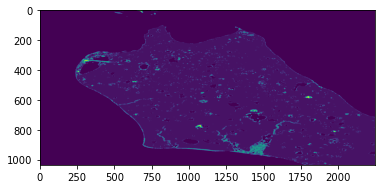

In [41]:
plt.imshow(prediction)

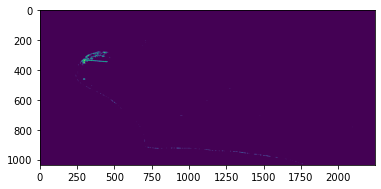

In [53]:
plt.imshow(prediction==15)

### Data Export 

In [57]:
with rasterio.open(DATA) as src:
    with rasterio.open(DATA_OUTPUT, mode='w', 
                    driver=src.driver, 
                    width=src.width, 
                    height=src.height, 
                    count=1, 
                    dtype='uint8', 
                    transform=src.transform,
                    crs=src.crs) as dst:
        dst.write_band(1, np.array(prediction, dtype=np.uint8))